# Moist Processes

Supplement to Chapter 7 of [_A First Course in Atmospheric Thermodynamics_ by Grant W. Petty, Sundog Publishing, 2008](https://sundogpublishingstore.myshopify.com/products/a-first-course-in-atmospheric-thermodynamics-g-w-petty)

## Plots of saturation vapor pressure



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from metpy.units import units

# constants for liquid water referenced to zero C
A = 2.53E11 * units.Pa 
B = 5420 * units.K

def es(T, A=A, B=B):
    return A * np.exp(-B/T)

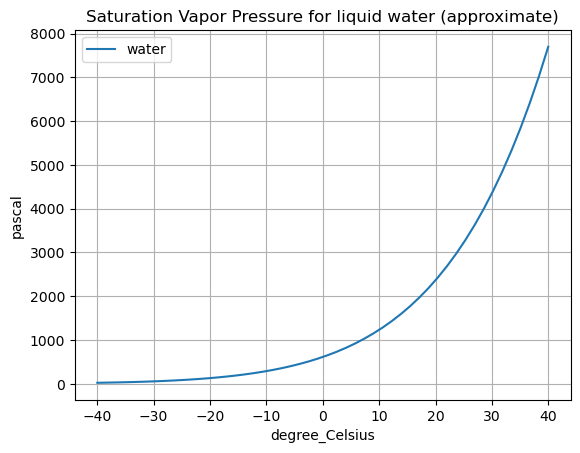

In [2]:
T = np.linspace(-40,40) * units.degC
plt.plot(T, es(T), label='water')  # the unit conversion is handled automatically
plt.legend()
plt.title('Saturation Vapor Pressure for liquid water (approximate)')
plt.grid()

## Plotting vapor lines on a Skew-T diagram

We are going to add lines of constant _saturation mixing ratio_ $w_s$ to a Skew-T thermodynamic diagram.

Lines of constant $w_s$ are often called _vapor lines_ or _mixing lines_.

Import necessary packages

In [3]:
from datetime import datetime
from siphon.simplewebservice.wyoming import WyomingUpperAir
from metpy.plots import SkewT
from metpy import calc as mpcalc
from metpy.plots import SkewT

Grab some data

In [7]:
date = datetime(year=2023, month=11, day=13, hour=12) # year, month, day, hour
station = 'BUF'  # station code for Buffalo, NY
df = WyomingUpperAir.request_data(date, station)

Make a plot

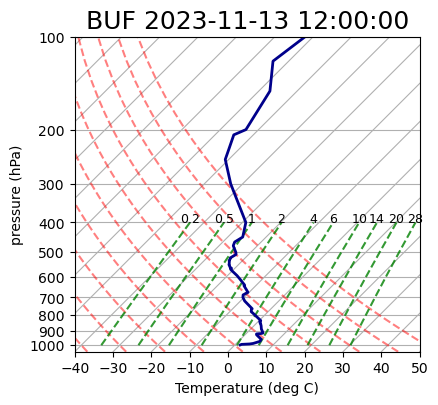

In [8]:
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig=fig, subplot=(2,1,2), rotation=45)
skew.plot(df['pressure'], df['temperature'], 
        'darkblue', linewidth=2)
skew.ax.set_title(f'{station} {date}', fontsize=18);
skew.plot_dry_adiabats()  
skew.ax.set_xlabel('Temperature (deg C)')
skew.ax.set_ylabel('pressure (hPa)');
# Here's where we add the new feature
w = np.array([0.028, 0.020, 0.014, 0.010, 0.006, 0.004, 0.002, 0.001, 0.0005, 0.0002])[:, None] * units('g/g')
p = units.hPa * np.linspace(1000, 400, 7)
top_p = p[-1]
skew.plot_mixing_lines(mixing_ratio=w, pressure=p)  
dewpt = mpcalc.dewpoint(mpcalc.vapor_pressure(pressure=top_p, mixing_ratio=w))
for i in range(len(w)):
    label_value = w[i].to('g/kg').magnitude[0]
    if label_value >= 1:
        label_value = int(label_value)
    skew.ax.text(dewpt[i][0], top_p, label_value,
                 horizontalalignment='center', fontsize=9)

## Plotting dewpoint temperatures on a Skew-T diagram

The sounding data includes the _dewpoint temperature_ $T_d$. We can plot that alongside the air temperature $T$.

Here we just add a new line to the existing figure and replot:

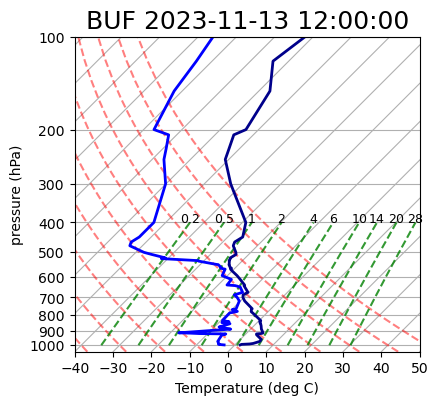

In [9]:
skew.plot(df['pressure'], df['dewpoint'], 
        'blue', linewidth=2)
fig